# ASSIGNMENT 3

In this kernel, I try to make predictions where the prediction task is to determine whether a person makes over 50K a year. I implement Random Forest Classification with Python and Scikit-Learn. So, to answer the question, I build a Random Forest classifier to predict whether a person makes over 50K a year.

I have used the Income classification data set for this project.

## Import libraries

In [1]:
#dataframe
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Classification Algorithms
import lightgbm as lgb
from xgboost import XGBClassifier
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Oversampling, Undersampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
df = pd.read_csv('data/data.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


**Splitting data into train and test set before carrying on**

In [3]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
display(train.shape, test.shape)

(35165, 15)

(8792, 15)

In [4]:
test.to_json('test_evaluate_api.json', orient='index')
output = test.iloc[:, :-1]
output.to_json('test_predict_api.json', orient='index')

In [5]:
X_train = train.iloc[:, :]
y_train = train["income_>50K"]
X_test = test.iloc[:, :]
y_test = test["income_>50K"]

### Exploratory data analysis

* Now, I will explore the data to gain insights about the data

In [6]:
# print the shape
print('The shape of the dataset : ', X_train.shape)

The shape of the dataset :  (35165, 15)


We can see that there are 35165 instances and 15 attributes in the data set.

In [7]:
#Listing Dataframe columns
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

* View summary of dataset

In [8]:
#Determining dataframe columns characteristics
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35165 entries, 0 to 35164
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              35165 non-null  int64 
 1   workclass        33165 non-null  object
 2   fnlwgt           35165 non-null  int64 
 3   education        35165 non-null  object
 4   educational-num  35165 non-null  int64 
 5   marital-status   35165 non-null  object
 6   occupation       33157 non-null  object
 7   relationship     35165 non-null  object
 8   race             35165 non-null  object
 9   gender           35165 non-null  object
 10  capital-gain     35165 non-null  int64 
 11  capital-loss     35165 non-null  int64 
 12  hours-per-week   35165 non-null  int64 
 13  native-country   34531 non-null  object
 14  income_>50K      35165 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [9]:
X_train.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,34,Private,238305,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,1628,12,NaN,0
1,30,Private,220915,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,0
2,47,Federal-gov,131726,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,1876,40,United-States,0
3,57,Private,47619,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States,0
4,66,NaN,357750,11th,7,Widowed,NaN,Not-in-family,Black,Female,0,0,40,United-States,0


Findings
We can see that the dataset contains 9 character variables and 6 numerical variables.

income is the target variable.

* View statistical properties of dataset

In [10]:
#Descriptive Analytics of quantitative variables in the dataframe
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,35165.0,38.582852,13.727722,17.0,28.0,37.0,48.0,90.0
fnlwgt,35165.0,189845.033698,106327.486804,13769.0,117381.0,178249.0,237865.0,1490400.0
educational-num,35165.0,10.080904,2.578838,1.0,9.0,10.0,12.0,16.0
capital-gain,35165.0,1090.824883,7533.125841,0.0,0.0,0.0,0.0,99999.0
capital-loss,35165.0,88.354500,404.455880,0.0,0.0,0.0,0.0,4356.0
hours-per-week,35165.0,40.402588,12.400490,1.0,40.0,40.0,45.0,99.0
income_>50K,35165.0,0.238362,0.426088,0.0,0.0,0.0,0.0,1.0


We can see that the above df.describe().T command presents statistical properties in horizontal form.

In [11]:
#calculating mode for categorical variables:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(X_train.select_dtypes(include=object).columns)

#printing mode of categorical variables
for item in categorical_var:
    print(item + " mode: "+ mode(X_train[item]))

0    workclass mode: Private
dtype: object
0    education mode: HS-grad
dtype: object
0    marital-status mode: Married-civ-spouse
dtype: object
0    occupation mode: Prof-specialty
dtype: object
0    relationship mode: Husband
dtype: object
0    race mode: White
dtype: object
0    gender mode: Male
dtype: object
0    native-country mode: United-States
dtype: object


Checking for null values

In [12]:
#Checking if any cells has missing values
X_train.isnull().sum()

age                   0
workclass          2000
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2008
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      634
income_>50K           0
dtype: int64

In [13]:
X_test.isnull().sum()

age                  0
workclass          498
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         498
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     129
income_>50K          0
dtype: int64

Interpretation

We can see that there are 3 columns missing values in the dataset.

In [14]:
## Dealing with NaN value
# Perform both ffill and bfill to accomodate all cases
X_train = X_train.fillna(method='ffill')
X_train = X_train.fillna(method='bfill')
X_test = X_test.fillna(method='ffill')
X_test = X_test.fillna(method='bfill')
print(X_train.isnull().sum())
print(X_test.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64


### Remove white space

In [15]:
X_train.columns = X_train.columns.str.lstrip()
X_test.columns = X_test.columns.str.lstrip()

## Explore Categorical Variables

### Find categorical variables

In [16]:
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 8 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [17]:
X_train[categorical].head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,Some-college,Married-civ-spouse,Other-service,Wife,White,Female,United-States
1,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
2,Federal-gov,Some-college,Divorced,Adm-clerical,Not-in-family,White,Male,United-States
3,Private,Assoc-acdm,Divorced,Prof-specialty,Not-in-family,Black,Female,United-States
4,Private,11th,Widowed,Prof-specialty,Not-in-family,Black,Female,United-States


* Frequency distribution of categorical variables

Now, we will check the frequency distribution of categorical variables.

In [18]:
for var in categorical: 
    
    print(X_train[var].value_counts())

Private             25943
Self-emp-not-inc     2948
Local-gov            2367
State-gov            1484
Self-emp-inc         1291
Federal-gov          1110
Without-pay            14
Never-worked            8
Name: workclass, dtype: int64
HS-grad         11350
Some-college     7815
Bachelors        5789
Masters          1929
Assoc-voc        1476
11th             1301
Assoc-acdm       1146
10th              997
7th-8th           664
Prof-school       603
9th               546
12th              478
Doctorate         438
5th-6th           385
1st-4th           189
Preschool          59
Name: education, dtype: int64
Married-civ-spouse       16013
Never-married            11686
Divorced                  4817
Widowed                   1098
Separated                 1079
Married-spouse-absent      449
Married-AF-spouse           23
Name: marital-status, dtype: int64
Prof-specialty       4733
Exec-managerial      4673
Craft-repair         4639
Sales                4256
Adm-clerical         425

* Percentage of frequency distribution of values

In [19]:
for var in categorical:
    
     print(X_train[var].value_counts()/np.float(len(X_train)))

Private             0.737751
Self-emp-not-inc    0.083833
Local-gov           0.067311
State-gov           0.042201
Self-emp-inc        0.036713
Federal-gov         0.031565
Without-pay         0.000398
Never-worked        0.000227
Name: workclass, dtype: float64
HS-grad         0.322764
Some-college    0.222238
Bachelors       0.164624
Masters         0.054856
Assoc-voc       0.041974
11th            0.036997
Assoc-acdm      0.032589
10th            0.028352
7th-8th         0.018882
Prof-school     0.017148
9th             0.015527
12th            0.013593
Doctorate       0.012456
5th-6th         0.010948
1st-4th         0.005375
Preschool       0.001678
Name: education, dtype: float64
Married-civ-spouse       0.455368
Never-married            0.332319
Divorced                 0.136983
Widowed                  0.031224
Separated                0.030684
Married-spouse-absent    0.012768
Married-AF-spouse        0.000654
Name: marital-status, dtype: float64
Prof-specialty       0.134594

In [20]:
# view the unique values

X_train['income_>50K'].unique()

array([0, 1])

In [21]:
# Checking the distribution of target variable
display(X_train['income_>50K'].value_counts(), X_train['income_>50K'].value_counts(normalize = True)*100)

0    26783
1     8382
Name: income_>50K, dtype: int64

0    76.163799
1    23.836201
Name: income_>50K, dtype: float64

**Visualize income variable**

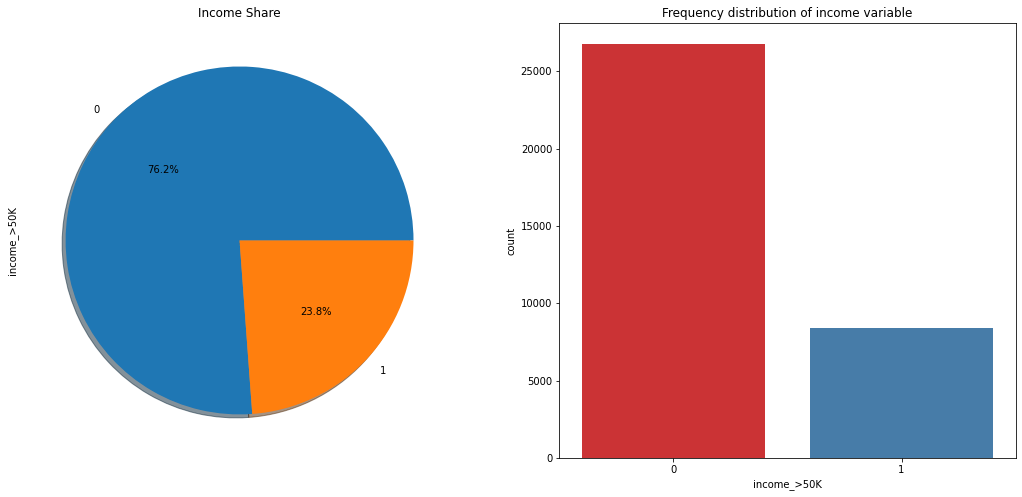

In [22]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = X_train['income_>50K'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="income_>50K", data=X_train, palette="Set1")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

Looking at the income_>50k column, which is the Y column of the dataset, it can easily be seen that this data is not balanced. People with income > 50k (value = "1") only accomodates for nearly 1/4 of the whole data. Some technique to deal with unbalanced dataset will need to be applied later before the model trainning.

**Visualize income with gender variable**

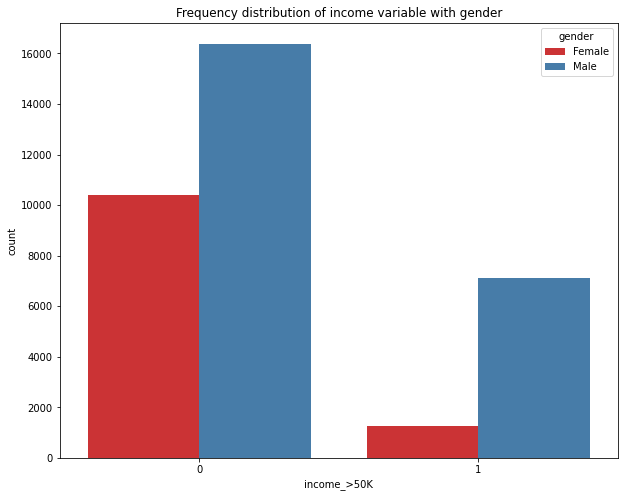

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income_>50K", hue="gender", data=X_train, palette="Set1")
ax.set_title("Frequency distribution of income variable with gender")
plt.show()

Interpretation:
We can see that males make more money than females in both the income categories.

**Visualize income with race**

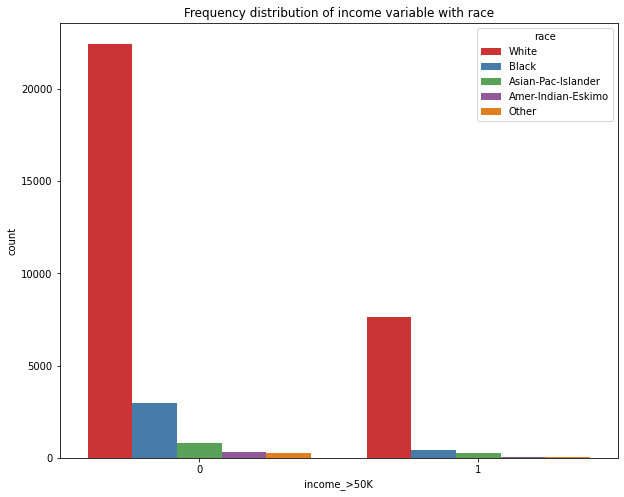

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income_>50K", hue="race", data=X_train, palette="Set1")
ax.set_title("Frequency distribution of income variable with race")
plt.show()

Interpretation¶
* We can see that whites make more money than non-whites in both the income categories.

**Explore workclass variable**

In [25]:
# view the unique labels

X_train.workclass.unique()

array(['Private', 'Federal-gov', 'Local-gov', 'State-gov', 'Self-emp-inc',
       'Self-emp-not-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [26]:
# view frequency distribution of values

X_train.workclass.value_counts()

Private             25943
Self-emp-not-inc     2948
Local-gov            2367
State-gov            1484
Self-emp-inc         1291
Federal-gov          1110
Without-pay            14
Never-worked            8
Name: workclass, dtype: int64

**Visualize workclass variable**

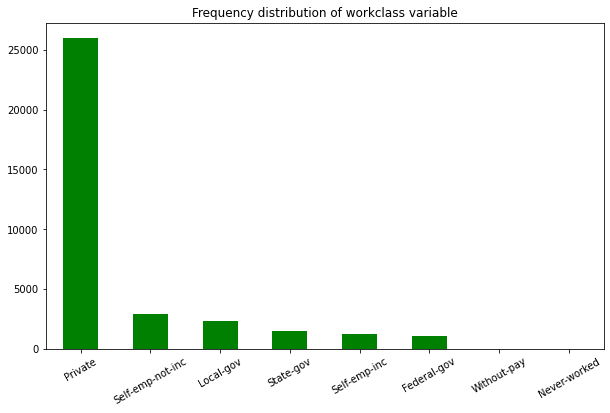

In [27]:
f, ax = plt.subplots(figsize=(10, 6))
ax = X_train.workclass.value_counts().plot(kind="bar", color="green")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(X_train.workclass.value_counts().index, rotation=30)
plt.show()

Interpretation¶
* We can see that there are lot more private workers than other category of workers.

**Visualize workclass variable with income variable**

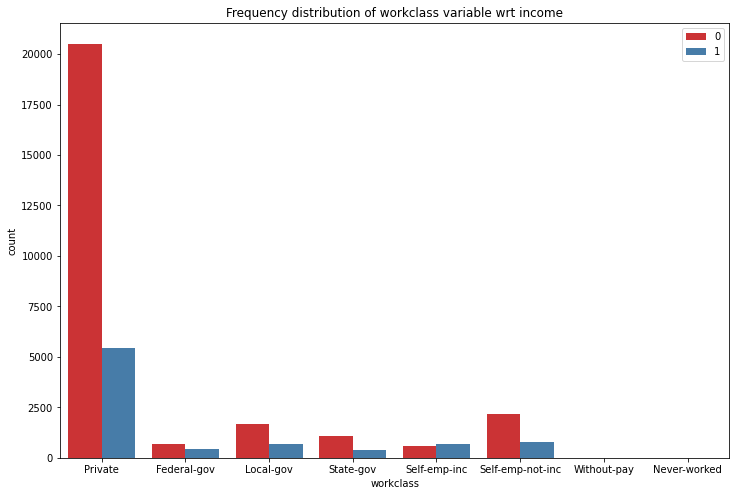

In [28]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income_>50K", data=X_train, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

Interpretation
* We can see that workers make less than equal to 50k in most of the working categories.

* But this trend is more appealing in Private workclass category.

**Visualize workclass variable with education variable**

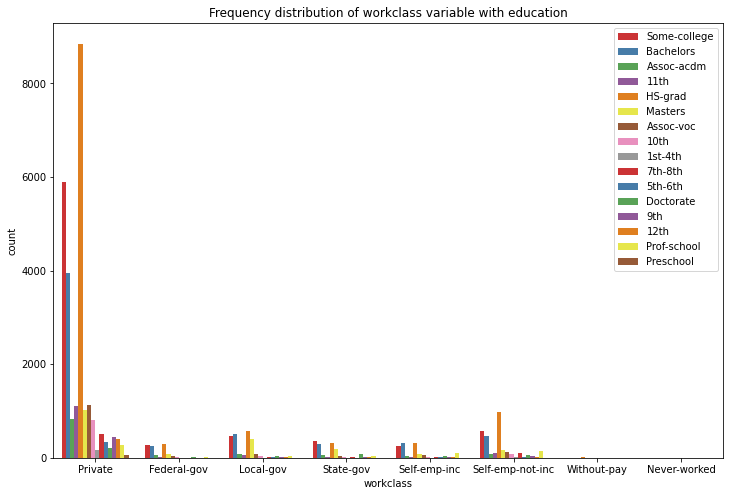

In [29]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="education", data=X_train, palette="Set1")
ax.set_title("Frequency distribution of workclass variable with education")
ax.legend(loc='upper right')
plt.show()

**Explore occupation variable**

In [30]:
X_train.occupation.unique()

array(['Other-service', 'Prof-specialty', 'Adm-clerical',
       'Transport-moving', 'Exec-managerial', 'Protective-serv',
       'Handlers-cleaners', 'Craft-repair', 'Machine-op-inspct', 'Sales',
       'Tech-support', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [31]:
#check the frequency distribution of values

X_train.occupation.value_counts()

Prof-specialty       4733
Exec-managerial      4673
Craft-repair         4639
Sales                4256
Adm-clerical         4253
Other-service        3771
Machine-op-inspct    2313
Transport-moving     1768
Handlers-cleaners    1582
Farming-fishing      1137
Tech-support         1095
Protective-serv       740
Priv-house-serv       194
Armed-Forces           11
Name: occupation, dtype: int64

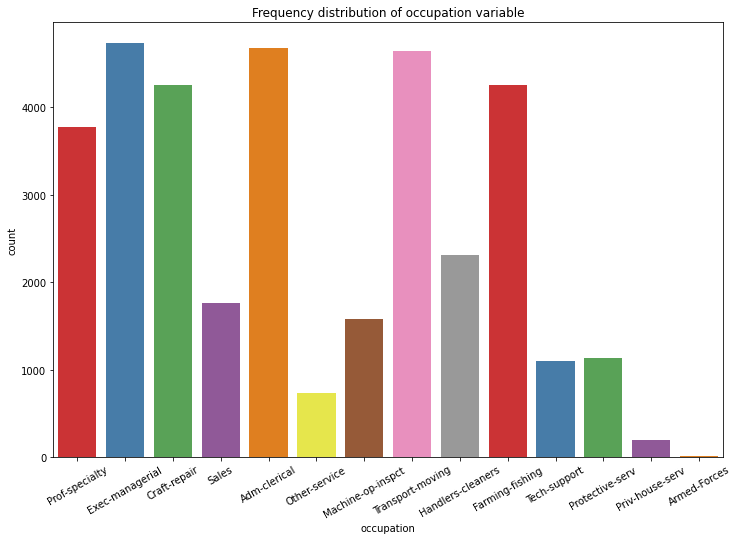

In [32]:
# visualize frequency distribution of `occupation` variable

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=X_train, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(X_train.occupation.value_counts().index, rotation=30)
plt.show()

**Explore native_country variable**

In [33]:
# view unique labels 

X_train['native-country'].unique()

array(['United-States', 'Iran', 'Italy', 'Puerto-Rico', 'Mexico',
       'France', 'China', 'England', 'El-Salvador', 'Taiwan', 'Canada',
       'South', 'Haiti', 'Vietnam', 'Ireland', 'Honduras', 'Poland',
       'India', 'Germany', 'Cuba', 'Greece', 'Philippines',
       'Dominican-Republic', 'Japan', 'Outlying-US(Guam-USVI-etc)',
       'Ecuador', 'Trinadad&Tobago', 'Columbia', 'Nicaragua', 'Scotland',
       'Peru', 'Cambodia', 'Laos', 'Thailand', 'Jamaica', 'Guatemala',
       'Portugal', 'Hungary', 'Yugoslavia', 'Hong'], dtype=object)

In [34]:
# check frequency distribution of values

X_train['native-country'].value_counts()

United-States                 32048
Mexico                          728
Philippines                     227
Germany                         154
Puerto-Rico                     136
Canada                          126
El-Salvador                     119
India                           108
Cuba                            103
China                           103
England                          96
South                            88
Dominican-Republic               88
Jamaica                          85
Italy                            76
Guatemala                        68
Japan                            65
Vietnam                          65
Poland                           65
Columbia                         59
Haiti                            57
Portugal                         50
Iran                             48
Taiwan                           44
Greece                           37
Peru                             32
Ecuador                          32
Nicaragua                   

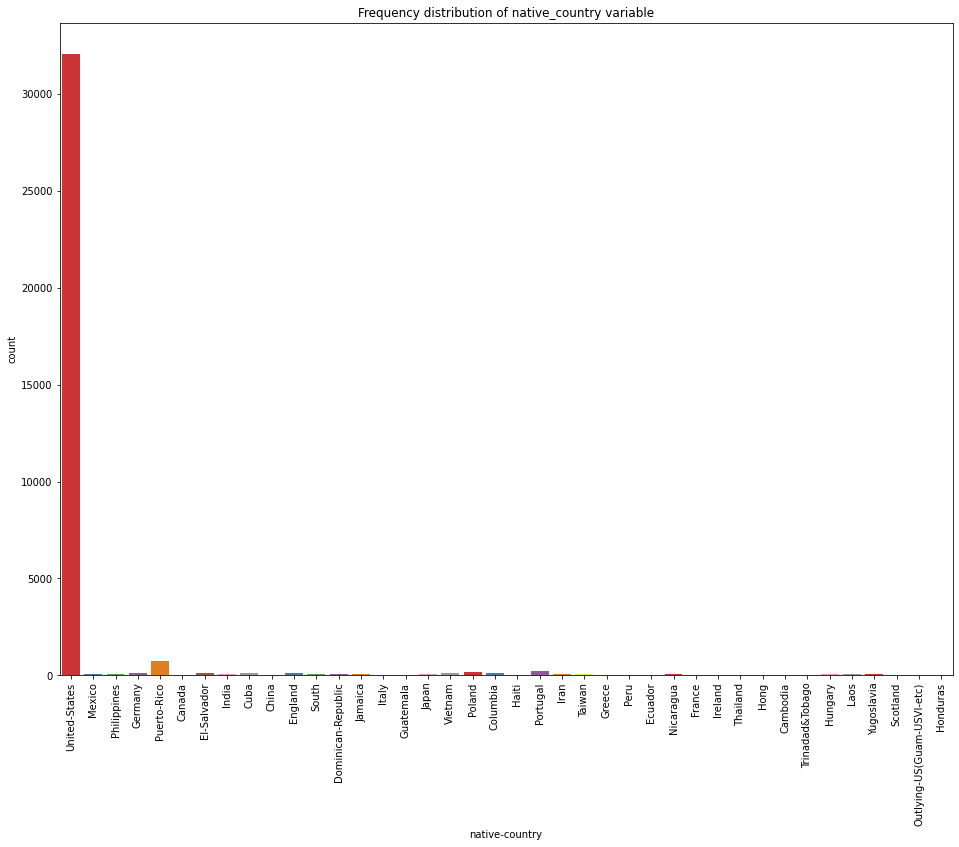

In [35]:
# visualize frequency distribution of `native_country` variable

f, ax = plt.subplots(figsize=(16, 12))
ax = sns.countplot(x="native-country", data=X_train, palette="Set1")
ax.set_title("Frequency distribution of native_country variable")
ax.set_xticklabels(X_train['native-country'].value_counts().index, rotation=90)
plt.show()

Intuition: This column might not be as important for classifcation problem as almost all of the people in this dataset is in the United States

In [36]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(X_train[var].unique()), ' labels')

workclass  contains  8  labels
education  contains  16  labels
marital-status  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
gender  contains  2  labels
native-country  contains  40  labels


## Explore Numerical Variables

* Find numerical variables

In [37]:
numerical = [var for var in X_train.columns if X_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 7 numerical variables

The numerical variables are :

 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_>50K']


In [38]:
X_train[numerical].head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
0,34,238305,10,0,1628,12,0
1,30,220915,13,0,0,60,0
2,47,131726,10,0,1876,40,0
3,57,47619,12,0,0,40,0
4,66,357750,7,0,0,40,0


Summary of numerical variables¶
* There are 6 numerical variables.

* These are given by age, fnlwgt, education_num,capital_gain, capital_loss and hours_per_week.

* All of the numerical variables are of discrete data type.

**Explore age variable**

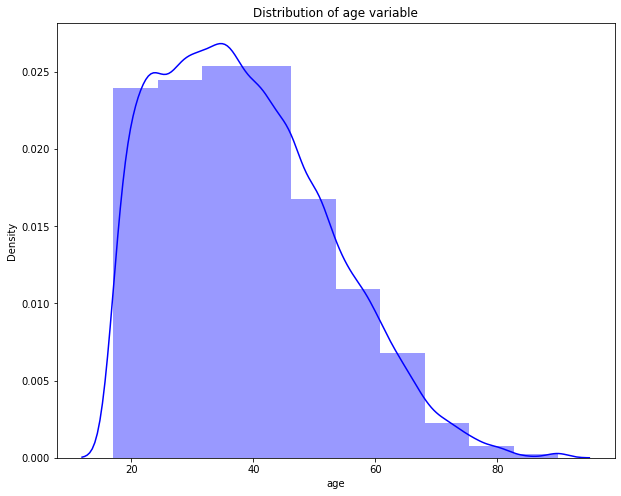

In [39]:
f, ax = plt.subplots(figsize=(10,8))
x = X_train['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

**Detect outliers in age variable with boxplot**

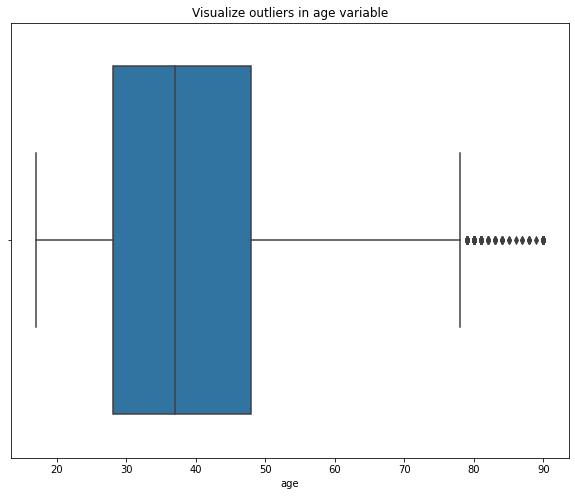

In [40]:
f, ax = plt.subplots(figsize=(10,8))
x = X_train['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

**Explore relationship between age and income variables**

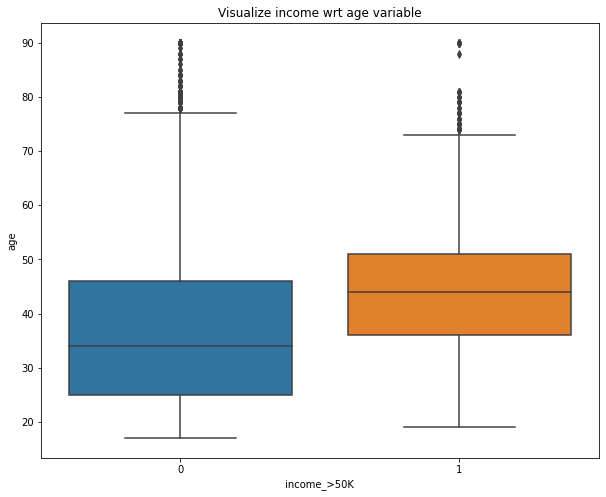

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income_>50K", y="age", data=X_train)
ax.set_title("Visualize income wrt age variable")
plt.show()

Interpretation
* As expected, younger people make less money as compared to senior people.

**Visualize income with age and sex variable**

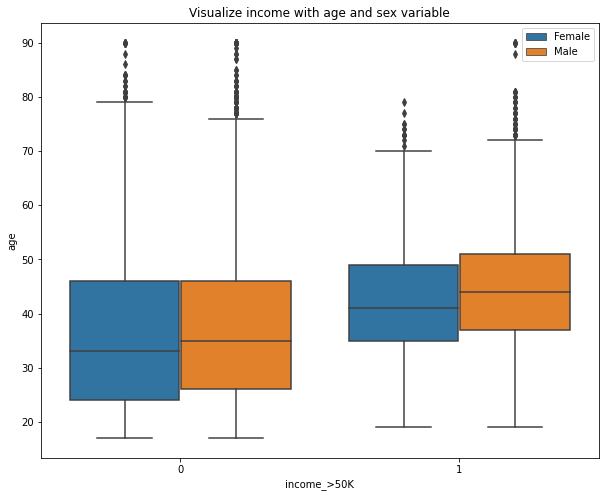

In [42]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income_>50K", y="age", hue="gender", data=X_train)
ax.set_title("Visualize income with age and sex variable")
ax.legend(loc='upper right')
plt.show()

Interpretation
* Senior people make more money than younger people.

**Visualize relationship between race and age**


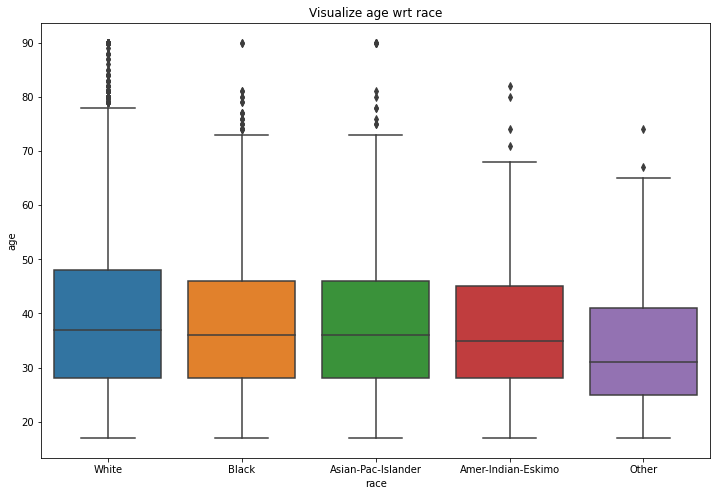

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(x ='race', y="age", data = X_train)
plt.title("Visualize age wrt race")
plt.show()

Interpretation¶
* Whites are more older than other groups of people.

**Find out the correlations**

In [44]:
# plot correlation heatmap to find out correlations

X_train.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
age,1.0,-0.08126,0.03711,0.07511,0.05652,0.07224,0.2315
fnlwgt,-0.08126,1.0,-0.04023,-0.00494,-0.007892,-0.01416,-0.007306
educational-num,0.03711,-0.04023,1.0,0.1284,0.08547,0.148,0.3366
capital-gain,0.07511,-0.00494,0.1284,1.0,-0.03163,0.08285,0.2239
capital-loss,0.05652,-0.007892,0.08547,-0.03163,1.0,0.05168,0.1458
hours-per-week,0.07224,-0.01416,0.148,0.08285,0.05168,1.0,0.2287
income_>50K,0.2315,-0.007306,0.3366,0.2239,0.1458,0.2287,1.0


Interpretation
* We can see that there is no strong correlation between variables.

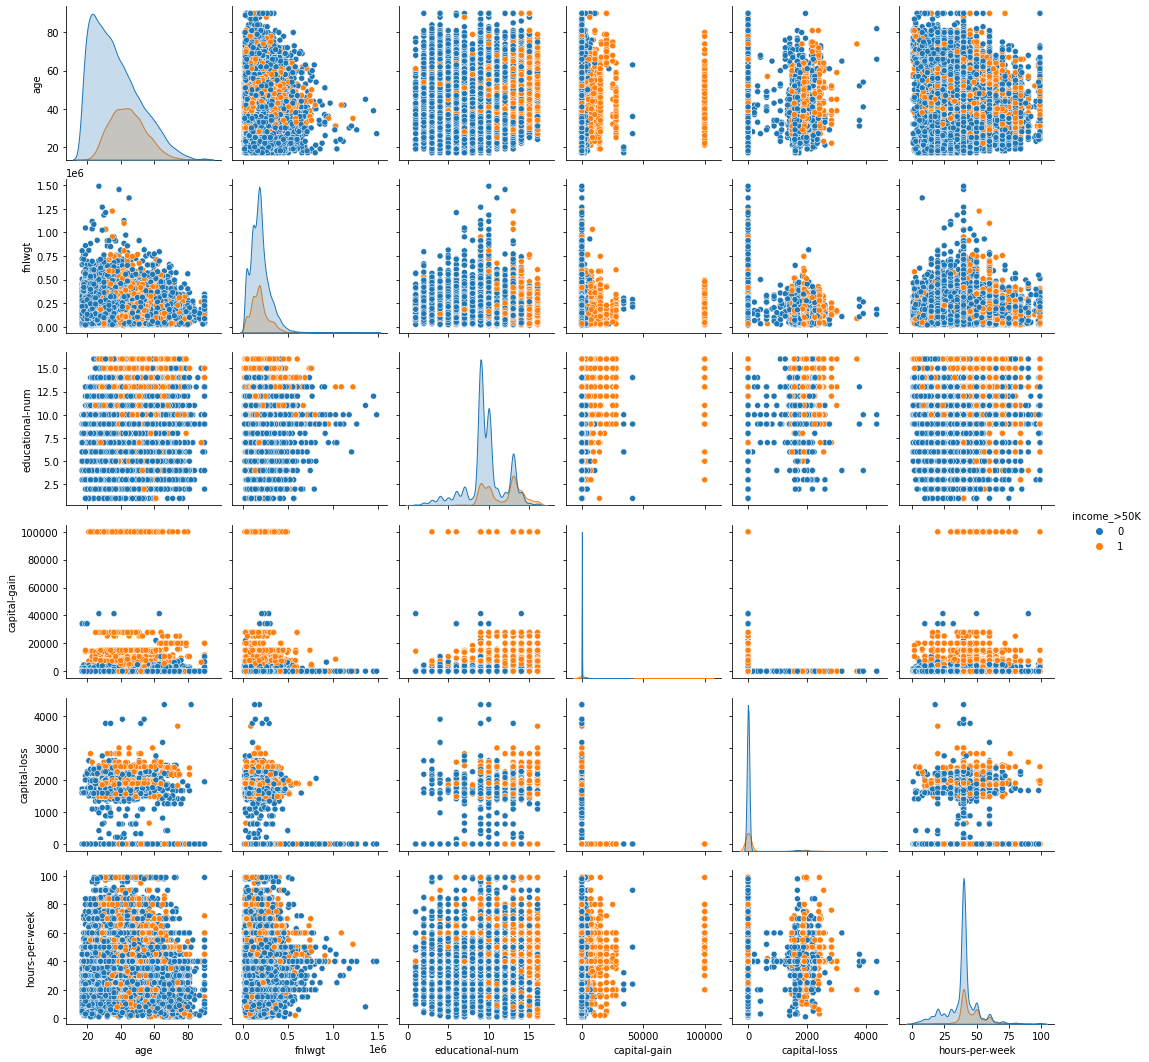

In [45]:
sns.pairplot(X_train, hue="income_>50K")
plt.show()

In [46]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((35165, 15), (8792, 15))

## Feature Engineering

**Remove Income column from X_train and X_test**

In [47]:
X_train = X_train.iloc[:, :-1]
X_test = X_test.iloc[:, :-1]

In [48]:
X_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,34,Private,238305,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,1628,12,United-States
1,30,Private,220915,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States
2,47,Federal-gov,131726,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,0,1876,40,United-States
3,57,Private,47619,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States
4,66,Private,357750,11th,7,Widowed,Prof-specialty,Not-in-family,Black,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35160,20,Self-emp-not-inc,133061,9th,5,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States
35161,47,Federal-gov,146786,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States
35162,18,Private,418176,Some-college,10,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,40,United-States
35163,33,Private,229636,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico


In [49]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
35160    0
35161    0
35162    0
35163    0
35164    1
Name: income_>50K, Length: 35165, dtype: int64

#### Encode categorical variables

From the Data Exploration above, encode the value in a library

In [50]:
train_encode_library = {
    'workclass': {
        'Private': 1,
        'Self-emp-not-inc': 2,
        'Local-gov': 3,
        'State-gov': 4,
        'Self-emp-inc': 5,
        'Federal-gov': 6,
        'Without-pay': 7,
        'Never-worked': 8
    },
    'marital-status': {
        'Married-civ-spouse': 1,
        'Never-married': 2,
        'Divorced': 3,
        'Widowed': 4,
        'Separated': 5,
        'Married-spouse-absent': 6,
        'Married-AF-spouse': 7
    },
    'occupation': {
        'Exec-managerial': 1,
        'Craft-repair': 2,
        'Prof-specialty': 3,
        'Sales': 4,
        'Adm-clerical': 5,
        'Other-service': 6,
        'Machine-op-inspct': 7,
        'Transport-moving': 8,
        'Handlers-cleaners': 9,
        'Farming-fishing': 10,
        'Tech-support': 11,
        'Protective-serv': 12,
        'Priv-house-serv': 13,
        'Armed-Forces': 14
    },
    'relationship': {
        'Husband': 1,
        'Not-in-family': 2,
        'Own-child': 3,
        'Unmarried': 4,
        'Wife': 5,
        'Other-relative': 6
    },
    'race': {
        'White': 1,
        'Black': 2,
        'Asian-Pac-Islander': 3,
        'Amer-Indian-Eskimo': 4,
        'Other': 5
    },
    'gender': {
        'Male': 1,
        'Female': 2
    },
    'native-country': {
        'United-States': 1,
        'Mexico': 2,
        'Philippines': 3,
        'Germany': 4,
        'Puerto-Rico': 5,
        'Canada': 6,
        'El-Salvador': 7,
        'India': 8,
        'Cuba': 9,
        'China': 10,
        'England': 11,
        'South': 12,
        'Dominican-Republic': 13,
        'Jamaica': 14,
        'Italy': 15,
        'Japan': 16,
        'Guatemala': 17,
        'Vietnam': 18,
        'Columbia': 19,
        'Poland': 20,
        'Haiti': 21,
        'Portugal': 22,
        'Taiwan': 23,
        'Iran': 24,
        'Nicaragua': 25,
        'Greece': 26,
        'Ecuador': 27,
        'Peru': 28,
        'Ireland': 29,
        'France': 30,
        'Hong': 31,
        'Thailand': 32,
        'Cambodia': 33,
        'Trinadad&Tobago': 34,
        'Yugoslavia': 35,
        'Outlying-US(Guam-USVI-etc)': 36,
        'Honduras': 37,
        'Scotland': 38,
        'Laos': 39,
        'Hungary': 40,
        'Holand-Netherlands': 41
    },
    'education': {
        'HS-grad': 9,
        'Some-college': 13,
        'Bachelors':  14,
        'Masters': 15,
        'Assoc-voc': 10,
        '11th': 7,
        'Assoc-acdm': 11,
        '10th': 6,
        '7th-8th': 4,
        'Prof-school': 12,
        '9th': 5,
        '12th': 8,
        'Doctorate': 16,
        '5th-6th': 3,
        '1st-4th': 2,
        'Preschool': 1
    }
}


**Encoding the data**

In [51]:
X_train_encoded = X_train.replace(train_encode_library,inplace=False)
X_test_encoded = X_test.replace(train_encode_library,inplace=False)

### Perform Oversampling using SMOTE

In [52]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state = 2) 
X_train_oversampling, y_train_oversampling = sm.fit_sample(X_train_encoded, y_train) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_oversampling == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_oversampling == 0)))

Before OverSampling, counts of label '1': 8382
Before OverSampling, counts of label '0': 26783 

After OverSampling, counts of label '1': 26783
After OverSampling, counts of label '0': 26783


**Perform Undersampling using NearMiss**


In [53]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

nr = NearMiss() 
X_train_undersampling, y_train_undersampling = nr.fit_sample(X_train_encoded, y_train) 

print("After Undersampling, counts of label '1': {}".format(sum(y_train_undersampling == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_undersampling == 0))) 

Before Undersampling, counts of label '1': 8382
Before Undersampling, counts of label '0': 26783 

After Undersampling, counts of label '1': 8382
After Undersampling, counts of label '0': 8382


### Feature Ranking and Recursive Feature Elimination

I will use these methods to eliminate the last 3 least important features

In [54]:
# Recursive Feature Elimination - feature selection
from sklearn.feature_selection import RFE
model = XGBClassifier()
rfe = RFE(model, n_features_to_select=11)
fit = rfe.fit(X_train_encoded, y_train)
print(X_train_encoded.columns)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

model.fit(X_train_encoded, y_train)
feature_scores = pd.Series(model.feature_importances_, index=X_train_encoded.columns).sort_values(ascending=False)

feature_scores

[21:53:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:53:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

marital-status     0.492624
educational-num    0.170712
capital-gain       0.106705
capital-loss       0.048657
education          0.036754
occupation         0.023701
age                0.022955
hours-per-week     0.020326
relationship       0.015882
gender             0.014877
workclass          0.014030
race               0.012008
native-country     0.010442
fnlwgt             0.010328
dtype: float32

According to both the Feature Ranking and RFE, column 'fnlwgt', 'native-country', and 'race' are the 3 least important features. I will remove these features to test in the modelling process

In [55]:
X_train_encoded_fe = X_train_encoded.copy()
X_test_encoded_fe = X_test_encoded.copy()

del X_train_encoded_fe["fnlwgt"]
del X_train_encoded_fe["native-country"]
del X_train_encoded_fe["race"]

del X_test_encoded_fe["fnlwgt"]
del X_test_encoded_fe["native-country"]
del X_test_encoded_fe["race"]

## Modeling

**Train and plot function from lecture**

In [56]:
def train_and_plot(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    print('Model accuracy for train set: {0:.3f}'.format(model.score(X_train, y_train)))
    print('Model accuracy for test set: {0:.3f}'.format(model.score(X_test, y_test)))

    y_pred = model.predict(X_test)

    # Classification Report
    print('\n{}'.format(classification_report(y_test, y_pred)))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print('\nConfusion Matrix:\n', cm)

    # Accuracy Score
    auc = accuracy_score(y_test, y_pred)
    print('\nAccuracy Score: ', auc.round(3))

    # ROC Curve
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.figure(figsize = (12.8 , 6))
    plt.plot(fpr, tpr, label = 'AUC = {})'.\
             format(model_roc_auc.round(4)))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc = 'lower right')
    plt.show()
    
    return model

## Model 1: Classifier algorithms with encoded data

[21:53:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.902
Model accuracy for test set: 0.872

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6656
           1       0.78      0.65      0.71      2136

    accuracy                           0.87      8792
   macro avg       0.84      0.80      0.81      8792
weighted avg       0.87      0.87      0.87      8792


Confusion Matrix:
 [[6267  389]
 [ 740 1396]]

Accuracy Score:  0.872


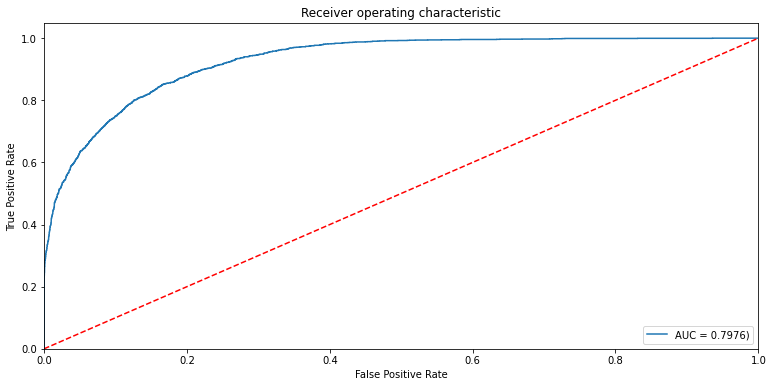

In [57]:
# XGBOOST
xgb1 = XGBClassifier()
model1_1 = train_and_plot(xgb1, X_train_encoded, y_train, X_test_encoded, y_test)

Model accuracy for train set: 0.787
Model accuracy for test set: 0.787

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6656
           1       0.63      0.30      0.40      2136

    accuracy                           0.79      8792
   macro avg       0.72      0.62      0.64      8792
weighted avg       0.76      0.79      0.76      8792


Confusion Matrix:
 [[6282  374]
 [1499  637]]

Accuracy Score:  0.787


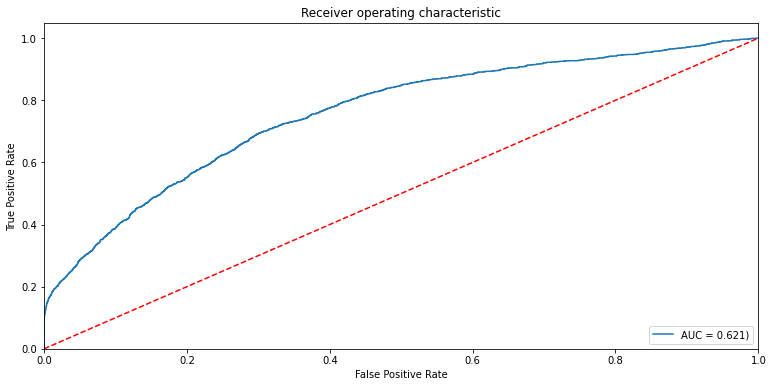

In [58]:
# Logistic Regression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr') # creates a lR instance
model1_2 = train_and_plot(lr, X_train_encoded, y_train, X_test_encoded, y_test)

Model accuracy for train set: 0.808
Model accuracy for test set: 0.807

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      6656
           1       0.72      0.33      0.45      2136

    accuracy                           0.81      8792
   macro avg       0.77      0.65      0.67      8792
weighted avg       0.79      0.81      0.78      8792


Confusion Matrix:
 [[6386  270]
 [1428  708]]

Accuracy Score:  0.807


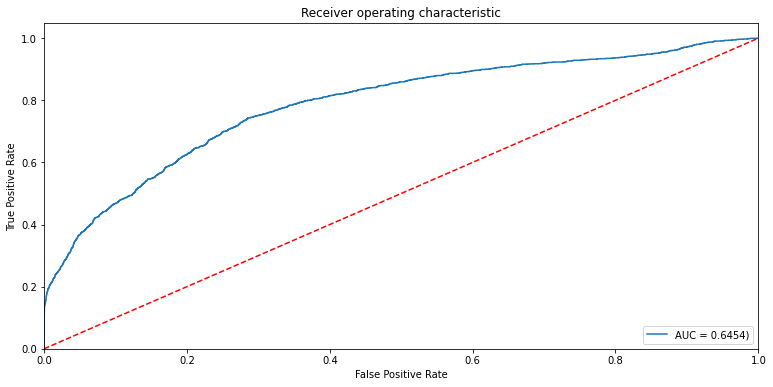

In [59]:
# Logistic Regression with hyperparameter tuning
LR = LogisticRegression()

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

model1_3 = train_and_plot(LR_hyper, X_train_encoded, y_train, X_test_encoded, y_test)

Model accuracy for train set: 0.865
Model accuracy for test set: 0.856

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6656
           1       0.80      0.54      0.65      2136

    accuracy                           0.86      8792
   macro avg       0.83      0.75      0.78      8792
weighted avg       0.85      0.86      0.85      8792


Confusion Matrix:
 [[6372  284]
 [ 979 1157]]

Accuracy Score:  0.856


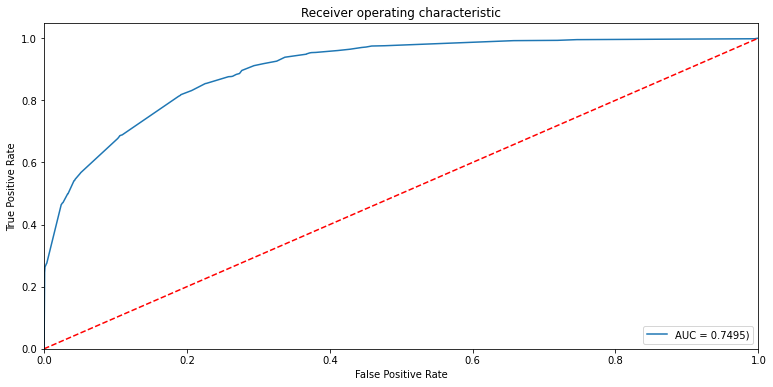

In [60]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=8)
model1_4 = train_and_plot(dt, X_train_encoded, y_train, X_test_encoded, y_test)

Model accuracy for train set: 0.952
Model accuracy for test set: 0.863

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6656
           1       0.79      0.60      0.68      2136

    accuracy                           0.86      8792
   macro avg       0.83      0.77      0.80      8792
weighted avg       0.86      0.86      0.86      8792


Confusion Matrix:
 [[6310  346]
 [ 861 1275]]

Accuracy Score:  0.863


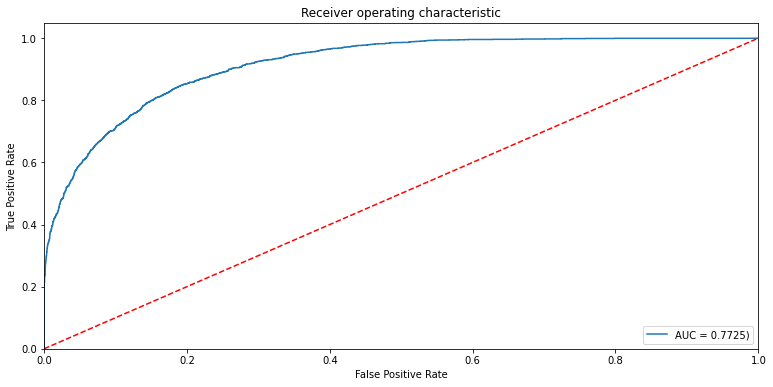

In [61]:
# Random Forests 
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=1000)
model1_5 = train_and_plot(rf, X_train_encoded, y_train, X_test_encoded, y_test)

Model accuracy for train set: 0.806
Model accuracy for test set: 0.796

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      6656
           1       0.82      0.21      0.33      2136

    accuracy                           0.80      8792
   macro avg       0.81      0.60      0.60      8792
weighted avg       0.80      0.80      0.75      8792


Confusion Matrix:
 [[6558   98]
 [1695  441]]

Accuracy Score:  0.796


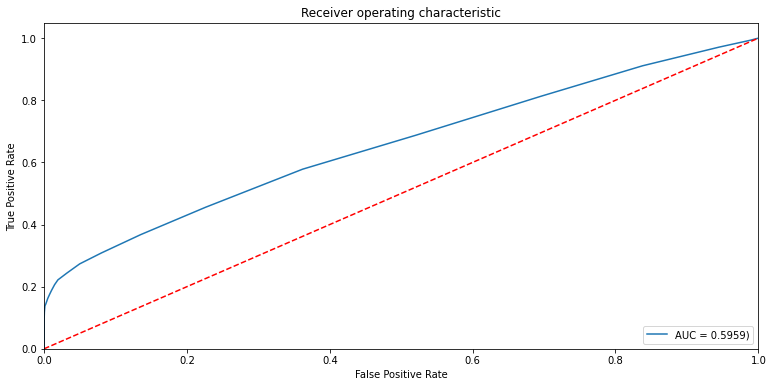

In [62]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 25)
model1_6 = train_and_plot(knn, X_train_encoded, y_train, X_test_encoded, y_test)

[21:54:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.891
Model accuracy for test set: 0.872

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6656
           1       0.79      0.65      0.71      2136

    accuracy                           0.87      8792
   macro avg       0.84      0.80      0.81      8792
weighted avg       0.87      0.87      0.87      8792


Confusion Matrix:
 [[6279  377]
 [ 750 1386]]

Accuracy Score:  0.872


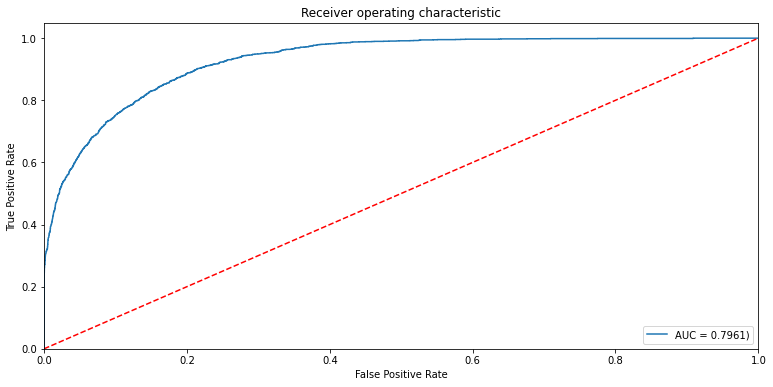

In [63]:
# XGBOOST
xgb1 = XGBClassifier()
model1_7 = train_and_plot(xgb1, X_train_encoded_fe, y_train, X_test_encoded_fe, y_test)

Model accuracy for train set: 0.865
Model accuracy for test set: 0.857

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6656
           1       0.81      0.54      0.65      2136

    accuracy                           0.86      8792
   macro avg       0.84      0.75      0.78      8792
weighted avg       0.85      0.86      0.85      8792


Confusion Matrix:
 [[6376  280]
 [ 978 1158]]

Accuracy Score:  0.857


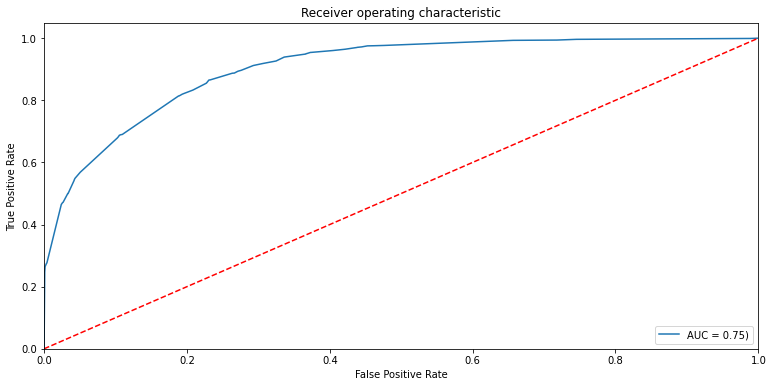

In [64]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=8)
model1_8 = train_and_plot(dt, X_train_encoded_fe, y_train, X_test_encoded_fe, y_test)

Model accuracy for train set: 0.945
Model accuracy for test set: 0.860

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6656
           1       0.77      0.61      0.68      2136

    accuracy                           0.86      8792
   macro avg       0.83      0.77      0.79      8792
weighted avg       0.85      0.86      0.85      8792


Confusion Matrix:
 [[6270  386]
 [ 842 1294]]

Accuracy Score:  0.86


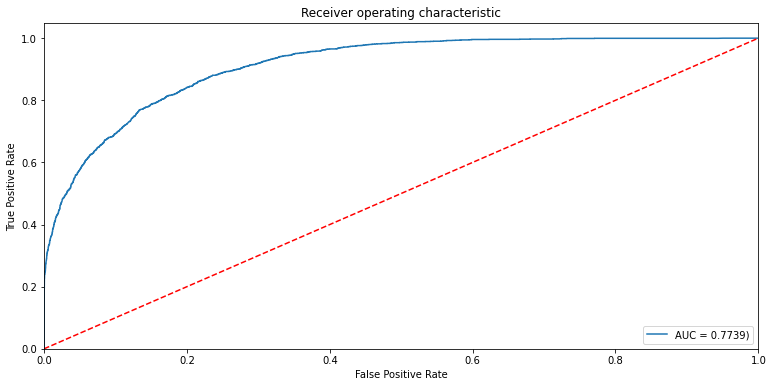

In [65]:
# Random Forests 
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=1000)
model1_9 = train_and_plot(rf, X_train_encoded_fe, y_train, X_test_encoded_fe, y_test)

### Section Takeaway:

| Model  | Accuracy Score | Precision/Recall "0" | Precision/Recall "1" |
| ------------- | ------------- | ------------- | ------------- | 
| Model 1_1 XGBOOST  | 0.872  | 0.89/0.94  | 0.78/0.65  |
| Model 1_2 Logistic Regression | 0.787  | 0.81/0.94  | 0.63/0.30  |
| Model 1_3 LR with hyper tuning | 0.807  | 0.82/0.96  | 0.72/0.33 |
| Model 1_4 Decision Tree | 0.856  | 0.87/0.96  | 0.80/0.54 |
| Model 1_5 Random Forest | 0.856  | 0.88/0.95  | 0.79/0.60 |
| Model 1_6 KNN | 0.796  | 0.79/0.99  | 0.82/0.21 |
| Model 1_7 XGBOOST with Feature Elimination | 0.872  | 0.89/0.94  | 0.79/0.65  |
| Model 1_8 Decision Tree with Feature Elimination | 0.857  | 0.87/0.96  |  0.81/0.54  |
| Model 1_9 RandomF Forest with Feature Elimination | 0.860  | 0.88/0.94  |  0.77/0.61  |

Using Feature Elimination slightly affect the final score.

After trainning the encoded data with 8 models, all models have overall Accuracy Score from ~0.8 to ~0.88. 

For classification models, these accuracy score is pretty great. But things are not as great when looking into recall and f1-score for each classification value. 

While most models can predict value "0" quite consistently, with precision in the range of 0.8-0.9 while the recall score is > 0.95, the precision and recall score for value "1" is not that great. Some more advanced models such as XGB (Extreme Gradient Boosting), Decisiton Tree, and Random Forest have an ok recall score of ~0.6, other models only have recall score for value "1" of ~0.35. 

This problem occurs because this dataset is not balanced. By applying oversampling and undersampling technique, the result from the model predicting value "1" might be better.

## Model 2: Classifier algorithms with undersampled data

[21:54:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.894
Model accuracy for test set: 0.750

              precision    recall  f1-score   support

           0       0.94      0.72      0.81      6656
           1       0.49      0.85      0.62      2136

    accuracy                           0.75      8792
   macro avg       0.71      0.78      0.72      8792
weighted avg       0.83      0.75      0.77      8792


Confusion Matrix:
 [[4783 1873]
 [ 328 1808]]

Accuracy Score:  0.75


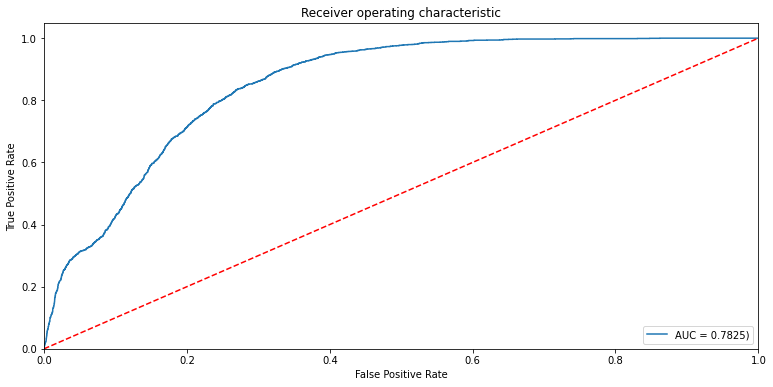

In [66]:
# XGBOOST
xgb1 = XGBClassifier()
model2_1 = train_and_plot(xgb1, X_train_undersampling, y_train_undersampling, X_test_encoded, y_test)

Model accuracy for train set: 0.826
Model accuracy for test set: 0.769

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      6656
           1       0.52      0.79      0.63      2136

    accuracy                           0.77      8792
   macro avg       0.72      0.78      0.73      8792
weighted avg       0.82      0.77      0.78      8792


Confusion Matrix:
 [[5068 1588]
 [ 441 1695]]

Accuracy Score:  0.769


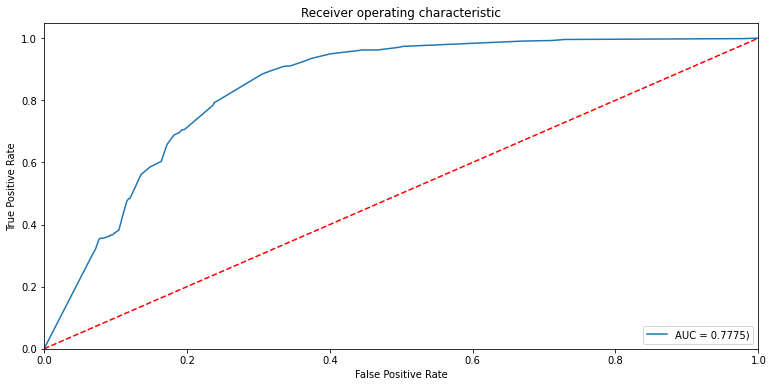

In [67]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=8)
model2_2 = train_and_plot(dt, X_train_undersampling, y_train_undersampling, X_test_encoded, y_test)

Model accuracy for train set: 1.000
Model accuracy for test set: 0.760

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      6656
           1       0.50      0.81      0.62      2136

    accuracy                           0.76      8792
   macro avg       0.71      0.78      0.72      8792
weighted avg       0.82      0.76      0.78      8792


Confusion Matrix:
 [[4948 1708]
 [ 401 1735]]

Accuracy Score:  0.76


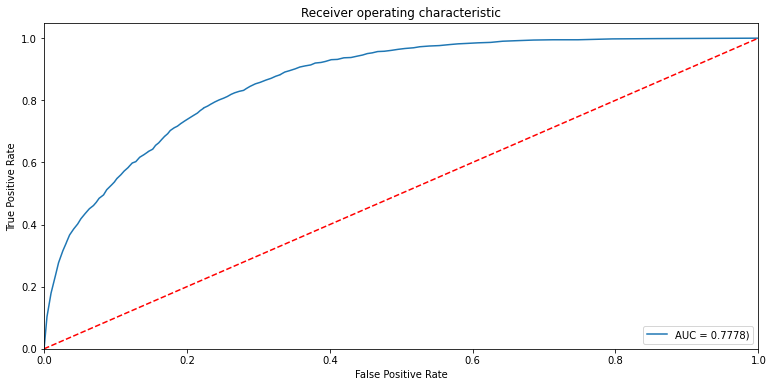

In [68]:
# create the classifier with n_estimators = 100

RFC = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
model2_3 = train_and_plot(RFC, X_train_undersampling, y_train_undersampling, X_test_encoded, y_test)

Section takeaway:

| Model  | Accuracy Score | Precision/Recall "0" | Precision/Recall "1" |
| ------------- | ------------- | ------------- | ------------- | 
| Model 2_1 XGBOOST  | 0.750  | 0.94/0.72  | 0.49/0.85  |
| Model 2_2 Decision Tree Undersampling | 0.769  | 0.92/0.76  | 0.52/0.79  |
| Model 2_3 RFF Undersampling | 0.760  | 0.93/0.74  | 0.50/0.81 |


By using undersampling, the prediction for value "1" was better. The recall score for value "1" is much higher than before, now within the range of ~0.8. But the precion score for value "1" as well as the recall score for value "0" has decreased significantly, leading to the overall decrease of the Accuracy Score

## Model 3: Classifier algorithms with oversampled data

[21:54:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.917
Model accuracy for test set: 0.851

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      6656
           1       0.68      0.74      0.71      2136

    accuracy                           0.85      8792
   macro avg       0.80      0.81      0.80      8792
weighted avg       0.86      0.85      0.85      8792


Confusion Matrix:
 [[5912  744]
 [ 563 1573]]

Accuracy Score:  0.851


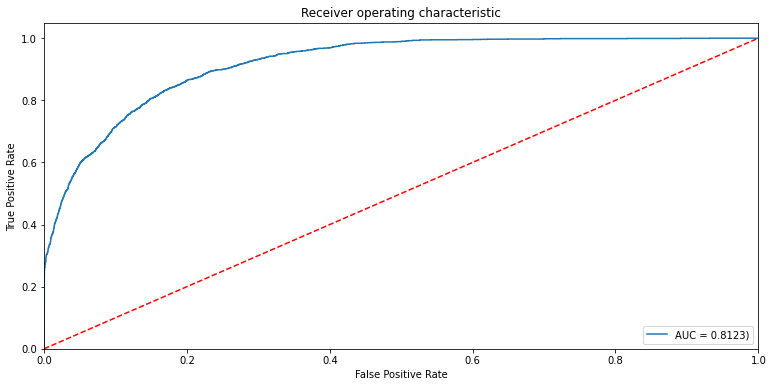

In [69]:
# XGBOOST
xgb1 = XGBClassifier()
model3_1 = train_and_plot(xgb1, X_train_oversampling, y_train_oversampling, X_test_encoded, y_test)

Model accuracy for train set: 0.858
Model accuracy for test set: 0.805

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      6656
           1       0.57      0.81      0.67      2136

    accuracy                           0.80      8792
   macro avg       0.75      0.81      0.76      8792
weighted avg       0.84      0.80      0.81      8792


Confusion Matrix:
 [[5351 1305]
 [ 411 1725]]

Accuracy Score:  0.805


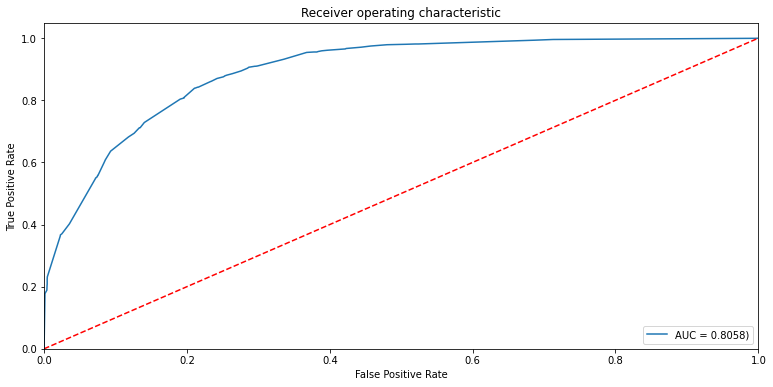

In [70]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=8)
model3_2 = train_and_plot(dt, X_train_oversampling, y_train_oversampling, X_test_encoded, y_test) 

Model accuracy for train set: 1.000
Model accuracy for test set: 0.837

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      6656
           1       0.65      0.70      0.68      2136

    accuracy                           0.84      8792
   macro avg       0.78      0.79      0.78      8792
weighted avg       0.84      0.84      0.84      8792


Confusion Matrix:
 [[5868  788]
 [ 642 1494]]

Accuracy Score:  0.837


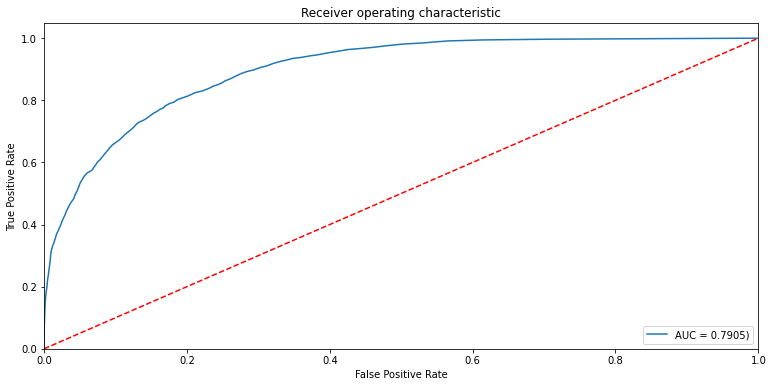

In [71]:
# create the classifier with n_estimators = 100

RFC = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
model3_3 = train_and_plot(RFC, X_train_oversampling, y_train_oversampling, X_test_encoded, y_test) 

**Section takaway: **

| Model  | Accuracy Score | Precision/Recall "0" | Precision/Recall "1" |
| ------------- | ------------- | ------------- | ------------- | 
| Model 3_1 XGBOOST  |  0.851  |  0.91/0.89  |  0.68/0.74  |
| Model 3_2 Decision Tree Oversampling |  0.804  |  00.93/0.80  |  0.57/0.81  |
| Model 3_3 RFF Oversampling |  0.837  |  0.90/0.88  | 0.65/0.70 |

Eventhough oversampling technique, the result has become much more balanced. Eventhough there is a small decrease in the recall score for value "0", overall, the prediction for value "1" has increased significantly, with recall score now raning in the ~0.75 range.

## Model 4: XGBClassifier with weighted parameter

[21:54:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.861
Model accuracy for test set: 0.822

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      6656
           1       0.59      0.87      0.70      2136

    accuracy                           0.82      8792
   macro avg       0.77      0.84      0.79      8792
weighted avg       0.86      0.82      0.83      8792


Confusion Matrix:
 [[5375 1281]
 [ 286 1850]]

Accuracy Score:  0.822


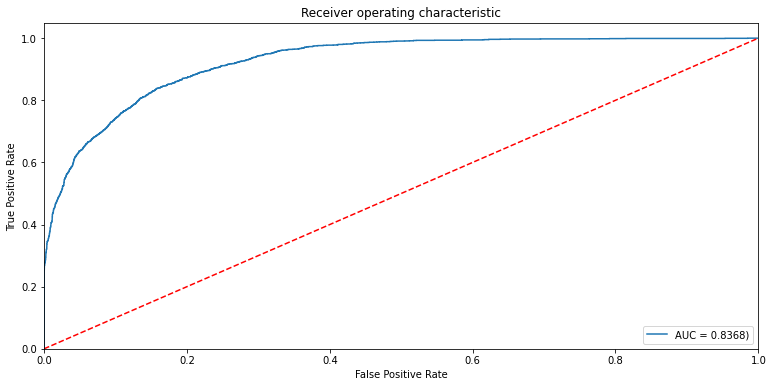

In [72]:
# XGBOOST
xgb1 = XGBClassifier(scale_pos_weight=4.0)
model4_1 = train_and_plot(xgb1, X_train_encoded, y_train, X_test_encoded, y_test)

| Model  | Accuracy Score | Precision/Recall "0" | Precision/Recall "1" |
| ------------- | ------------- | ------------- | ------------- | 
| Model 4_1 XGBOOST |  0.822  |  0.95/0.81  |  0.59/0.87  |

Compare The Best Model From all section (High score Precision/Reacall for "1" as well as accuracy score)

| Model  | Accuracy Score | Precision/Recall "0" | Precision/Recall "1" |
| ------------- | ------------- | ------------- | ------------- | 
| Model 1_1 XGBOOST  | 0.872  | 0.89/0.94  | 0.78/0.65  |
| Model 2_1 XGBOOST  | 0.750  | 0.94/0.72  | 0.49/0.85  |
| Model 3_1 XGBOOST  |  0.851  |  0.91/0.89  |  0.68/0.74  |
| Model 4_1 XGBOOST |  0.822  |  0.95/0.81  |  0.59/0.87  |

All the best model (based on High score Precision/Reacall for "1" as well as accuracy score) uses XGBoost.

Using scale_pos_weight parameter to change the weight of the value does make a signifiact difference with the original encoded data. This is a good alternative for oversampling technique, but for the final model, I will use the oversampling techinique with XGBClassifier.

## Final Model 

XGBoost Hyper Parameter tuning

In [73]:
#Importing necessary libraries
from bayes_opt import BayesianOptimization
import xgboost as xgb

#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(X_train_oversampling,y_train_oversampling)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,150)
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
[21:54:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:541: 
Parameters: { n_estimators } might not be used.

  Thi

In [74]:
params = xgb_bo.max['params']
print(params)

{'gamma': 0.0, 'learning_rate': 0.32583726574398975, 'max_depth': 7.102692743518264, 'n_estimators': 133.9452371840692}


XGB Parameter tuning will be different after rerunning notebook

## Final Model (Model 3_1)

[21:55:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy for train set: 0.955
Model accuracy for test set: 0.853

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6656
           1       0.69      0.72      0.71      2136

    accuracy                           0.85      8792
   macro avg       0.80      0.81      0.80      8792
weighted avg       0.86      0.85      0.85      8792


Confusion Matrix:
 [[5959  697]
 [ 593 1543]]

Accuracy Score:  0.853


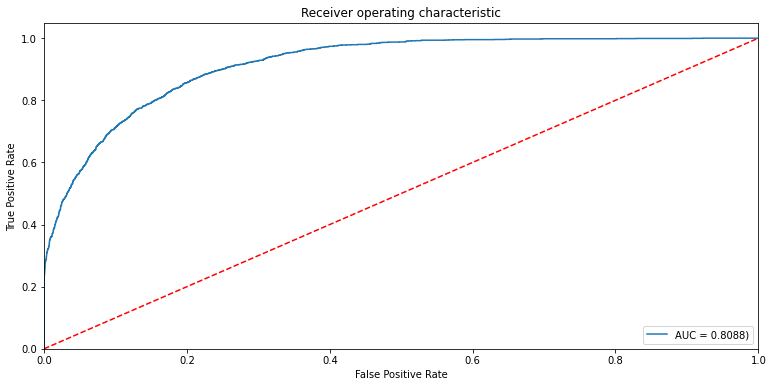

In [75]:
# XGBOOST
xgb1 = XGBClassifier(gamma=0.26, learning_rate=0.3084, max_depth=9, n_estimators=119)
model_final = train_and_plot(xgb1, X_train_oversampling, y_train_oversampling, X_test_encoded, y_test)
y_final = model_final.predict(X_test_encoded)

| Model  | Accuracy Score | Precision/Recall "0" | Precision/Recall "1" |
| ------------- | ------------- | ------------- | ------------- | 
| Model 3_1 XGBOOST  |  0.851  |  0.91/0.89  |  0.68/0.74  |
| Model Final  |  0.853  |  0.91/0.89  |  0.69/0.72  |

**Export Data for Dashboard**

In [76]:
X_train_export = train.iloc[:, :-1]
y_train_export = train["income_>50K"]
X_test_export = test.iloc[:, :-1]
y_test_export = test["income_>50K"]

X_train_export.to_csv('X_train.csv',index=False)
y_train_export.to_csv('y_train.csv',index=False)
X_test_export.to_csv('X_test.csv',index=False)
y_test_export.to_csv('y_test.csv',index=False)

In [77]:
y_final_export=pd.DataFrame(data=y_final[0:],
               index=[i for i in range(y_final.shape[0])],
               columns=['income_>50K'])
y_final_export.to_csv('y_final.csv',index=False)

**Exporting final model**

In [78]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_final, file)